# Homework_2

# Part 1: Digit recognition using CNNs


# 1. Importing Libraries and the Dataset

In [255]:
import pandas as pd
import seaborn as sns
import tensorflow                       
import numpy as np                           
import matplotlib.pyplot as plt  

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,  Input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import backend as K
%matplotlib inline


ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [256]:
import tensorflow 

print("TensorFlow version:", tensorflow.__version__)


TensorFlow version: 2.14.0


In [257]:
 # Loading data
(X_train, y_train) , (X_test, y_test) =mnist.load_data()     

In [258]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [259]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [260]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [261]:
# Checking the shape of one image
X_train[169].shape

(28, 28)

In [262]:
X_train[169] # 169 . pixel counts of the image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  42, 235, 255,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        132, 208, 253, 253, 171, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [263]:
import matplotlib.pyplot as plt

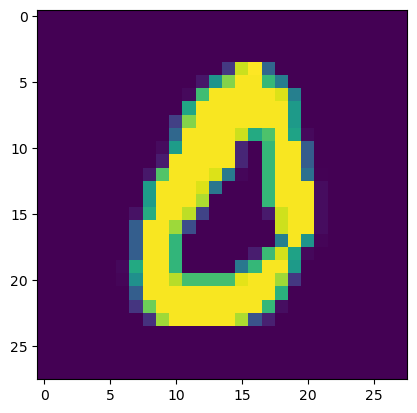

In [269]:
plt.imshow(X_train[169]) # to visualize an image from a dataset

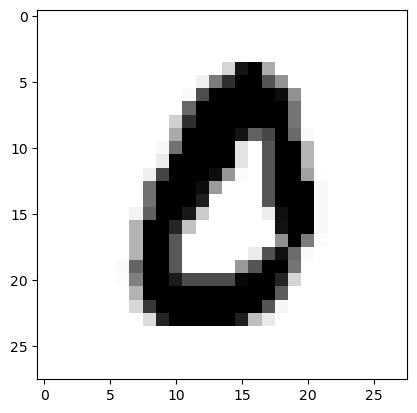

In [268]:
# visualizing grayscale images where values range from 0 to 1, with 0 being black and 1 being white
plt.imshow(X_train[169], cmap= plt.cm.binary) 

In [266]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

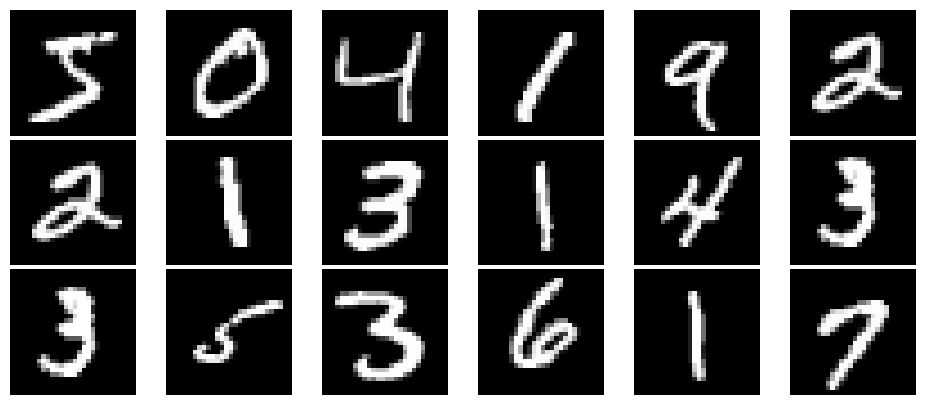

In [270]:
 # I selected 3 rows and 6 columns from the data.
num_rows, num_cols = 3, 6       
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

C:\Users\bulen\AppData\Local\Temp\ipykernel_16436\3924017328.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


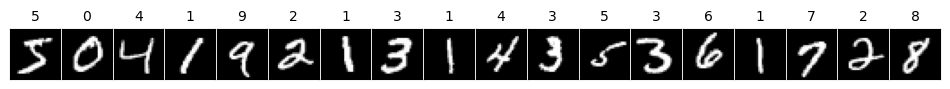

In [271]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=18, figsize=(12,5),
                         gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                         squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)
    
plt.tight_layout()
plt.show()

# 2. Data Preprocessing

In [272]:
X_train[9].min()

0

In [273]:
X_train[9].max()

255

In [274]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [275]:
X_train[17]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [277]:
X_train[17].min()

0.0

In [276]:
X_train[17].max()

1.0

In [278]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [279]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

If X_train was a single 28x28 matrix (shape=(60000, 28, 28)), it would not be possible to fit it into a CNN model because CNN models expect a 4-dimensional data structure. Therefore, we reshape X_train into a 4-dimensional data structure (60000, 28, 28, 1).Eğer X_train, 28x28 boyutunda tek bir matris (shape=(60000, 28, 28)) olsaydı, onu bir CNN modeline sokmak mümkün olmazdı çünkü CNN modelleri 4 boyutlu bir veri yapısı beklerler. Bu nedenle, reshape işlemi yapılarak X_train, 4 boyutlu bir veri yapısı olan (60000, 28, 28, 1) şekline dönüştürülmüştür.

In [229]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [230]:
X_train[777].shape

(28, 28, 1)

In [231]:
from tensorflow.keras.utils import to_categorical

In [232]:
y_train[115]

4

In [233]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [234]:
Y_train[115]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [235]:
Y_train[715]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 3. Build Model

In [236]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization


In [237]:

model = Sequential() 

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())  
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

#  model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

In [123]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_146 (Conv2D)         (None, 26, 26, 64)        640       
                                                                 
 conv2d_147 (Conv2D)         (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_72 (Ba  (None, 12, 12, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_35 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_148 (Conv2D)         (None, 10, 10, 128)     

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

60.000/32

# 4. Train the Model

In [126]:
model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/50
469/469 [==============================] - 169s 355ms/step - loss: 0.7449 - accuracy: 0.7770 - val_loss: 2.1341 - val_accuracy: 0.2558
Epoch 2/50
469/469 [==============================] - 176s 374ms/step - loss: 0.2554 - accuracy: 0.9309 - val_loss: 0.0605 - val_accuracy: 0.9814
Epoch 3/50
469/469 [==============================] - 173s 369ms/step - loss: 0.1819 - accuracy: 0.9509 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 4/50
469/469 [==============================] - 173s 369ms/step - loss: 0.1429 - accuracy: 0.9607 - val_loss: 0.0394 - val_accuracy: 0.9876
Epoch 5/50
469/469 [==============================] - 174s 371ms/step - loss: 0.1264 - accuracy: 0.9650 - val_loss: 0.0364 - val_accuracy: 0.9889
Epoch 6/50
469/469 [==============================] - 190s 405ms/step - loss: 0.1150 - accuracy: 0.9689 - val_loss: 0.0355 - val_accuracy: 0.9896
Epoch 7/50
469/469 [==============================] - 185s 394ms/step - loss: 0.1041 - accuracy: 0.9718 - val_loss: 0.0320 -

# 5. Model Evaluation

In [127]:
model.metrics_names  

['loss', 'accuracy']

In [280]:
model.history.history   

{}

In [284]:
summary = pd.DataFrame(model.history.history)
summary.head()

Empty DataFrame
Columns: []
Index: []

In [282]:
summary.tail(1)

loss  accuracy  val_loss  val_accuracy
12  0.078238  0.978567  0.027024        0.9923

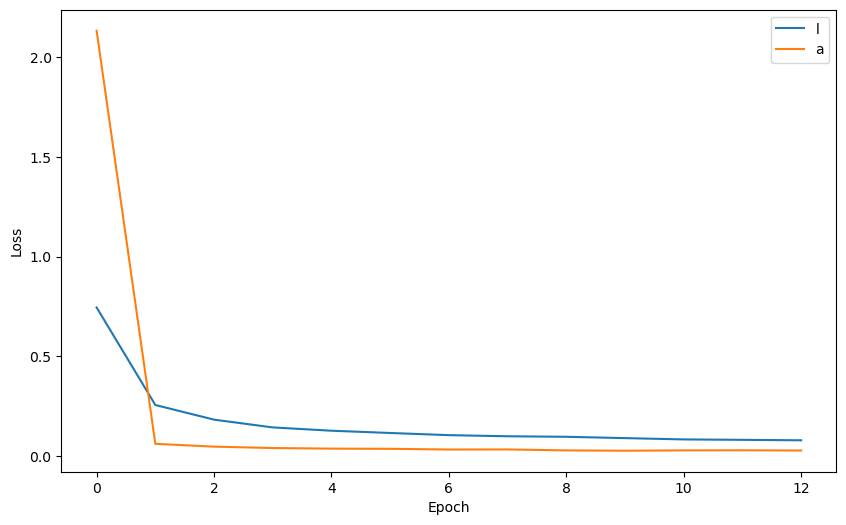

In [131]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

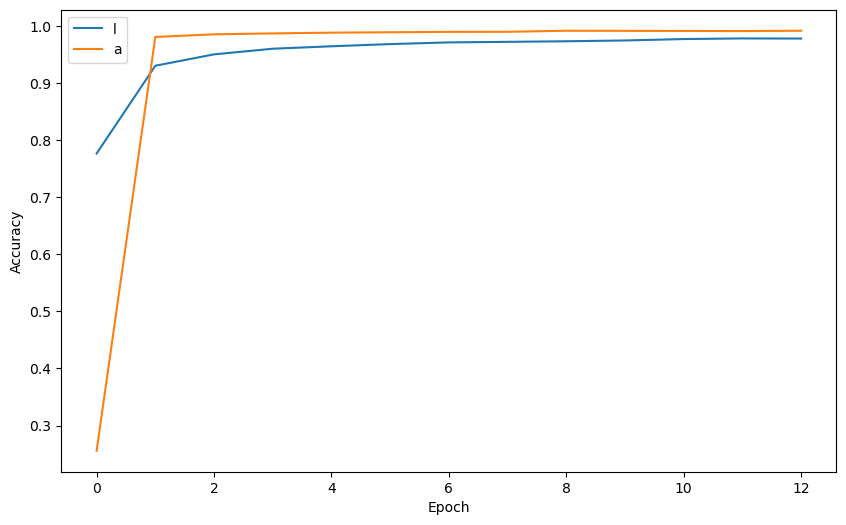

In [132]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [133]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 6s 19ms/step - loss: 0.0270 - accuracy: 0.9923
[0.027023926377296448, 0.9922999739646912]


model.evaluate() fonksiyonu, modelin test setindeki performansını hesaplar. Bu fonksiyona test seti verileri (X_test) ve gerçek etiketleri (Y_test) parametre olarak verilir. Fonksiyon, iki değer döndürür: test seti üzerindeki kayıp (loss) ve doğruluk (accuracy) oranı.

In [134]:
from sklearn.metrics import classification_report,confusion_matrix

In [135]:
preds = model.predict(X_test)
preds

313/313 [==============================] - 6s 18ms/step


array([[1.1568714e-08, 2.0445493e-06, 1.0866900e-06, ..., 9.9999237e-01,
        9.0181489e-09, 2.9102362e-06],
       [2.3530411e-04, 1.7402603e-04, 9.9907875e-01, ..., 3.9856957e-04,
        8.9221585e-06, 9.4379550e-07],
       [1.7022966e-08, 9.9999607e-01, 8.4638714e-08, ..., 2.0573348e-06,
        1.8597447e-08, 4.2697952e-09],
       ...,
       [2.6512648e-10, 3.2277477e-08, 2.8749469e-10, ..., 5.3072400e-09,
        1.0295665e-08, 2.3230912e-06],
       [5.7021740e-08, 2.6092517e-08, 1.4452644e-09, ..., 1.2623191e-09,
        1.3689657e-06, 1.8946079e-07],
       [6.3857528e-06, 5.8954708e-07, 4.2866070e-08, ..., 5.4895044e-09,
        2.8706512e-07, 8.5340917e-09]], dtype=float32)

preds değişkeni, modelimiz tarafından tahmin edilen test veri setindeki her bir görüntünün sınıf tahminlerini içeren bir numpy dizisidir. Yani, her bir test görüntüsü için, modelimiz tarafından öngörülen sınıfın olasılıklarını gösterir.

In [137]:
preds[2]

array([1.7022966e-08, 9.9999607e-01, 8.4638714e-08, 4.3280622e-08,
       7.9135310e-07, 1.7980908e-07, 6.0278575e-07, 2.0573348e-06,
       1.8597447e-08, 4.2697952e-09], dtype=float32)

In [138]:
preds[1]

array([2.3530411e-04, 1.7402603e-04, 9.9907875e-01, 7.2064497e-05,
       1.6062826e-05, 7.0507730e-07, 1.4582739e-05, 3.9856957e-04,
       8.9221585e-06, 9.4379550e-07], dtype=float32)

In [139]:
predictions= np.argmax(preds, axis=1)

The variable predictions is assigned the indices of the class with the highest probability in the numpy array preds. The axis=1 parameter specifies that argmaxing is done by columns (i.e. comparing the class probabilities in each instance). As a result, the predictions array contains the indices of the class with the highest probability for each instance in the preds array.

In [140]:
len(predictions)

10000

In [141]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [142]:
print(predictions[:300]) # 300 of all the predictions made by the model

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8]


# Test  data  scores

In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      1.00      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [144]:
print(confusion_matrix(y_test, predictions))

[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   2    1 1021    0    0    0    3    5    0    0]
 [   0    0    2 1003    0    3    0    1    1    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   3    3    0    3    0  877    5    1    0    0]
 [   6    3    0    0    1    1  947    0    0    0]
 [   0    5    3    0    0    1    0 1019    0    0]
 [   0    1    1    0    1    0    1    0  967    3]
 [   4    0    0    0    2    0    0    3    1  999]]


In [145]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027023926377296448
Test accuracy: 0.9922999739646912


# Result and Conclusion

## A sample prediction from the test set 

In [149]:
my_number = X_test[12]

In [150]:
my_number.shape

(28, 28, 1)

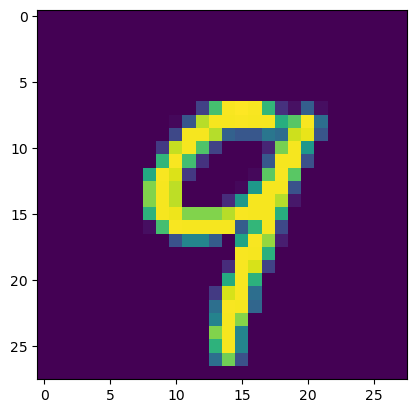

In [151]:
plt.imshow(my_number); 

In [287]:
model.predict(my_number.reshape(1,28,28,1))



1/1 [==============================] - 0s 40ms/step


array([[3.1494686e-08, 2.1716114e-10, 2.3205611e-10, 7.6041156e-09,
        9.2356668e-06, 6.4988903e-08, 3.3388381e-09, 1.1944617e-07,
        7.1081800e-08, 9.9999046e-01]], dtype=float32)

In [281]:
# save model  for use  next task

In [153]:
model.save("MNIST_Model.h5")

C:\Users\bulen\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Part 2: Input optimization for a CNN

# 1.Read your data.

In [246]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

In [247]:
 # Loading data
(_, _), (X_test, y_test) = mnist.load_data()    

# 2.Load your model from the first part.

In [248]:
model = load_model("MNIST_Model.h5")

# Model Test

In [288]:
# Select sample data and get prediction from our model
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx]
prediction = model.predict(sample.reshape(1, 28, 28, 1))

# Write  prediction result
print(f"Actual Label: {y_test[idx]}")
print(f"Predicted Label: {np.argmax(prediction)}")

1/1 [==============================] - 0s 39ms/step
Actual Label: 1
Predicted Label: 1


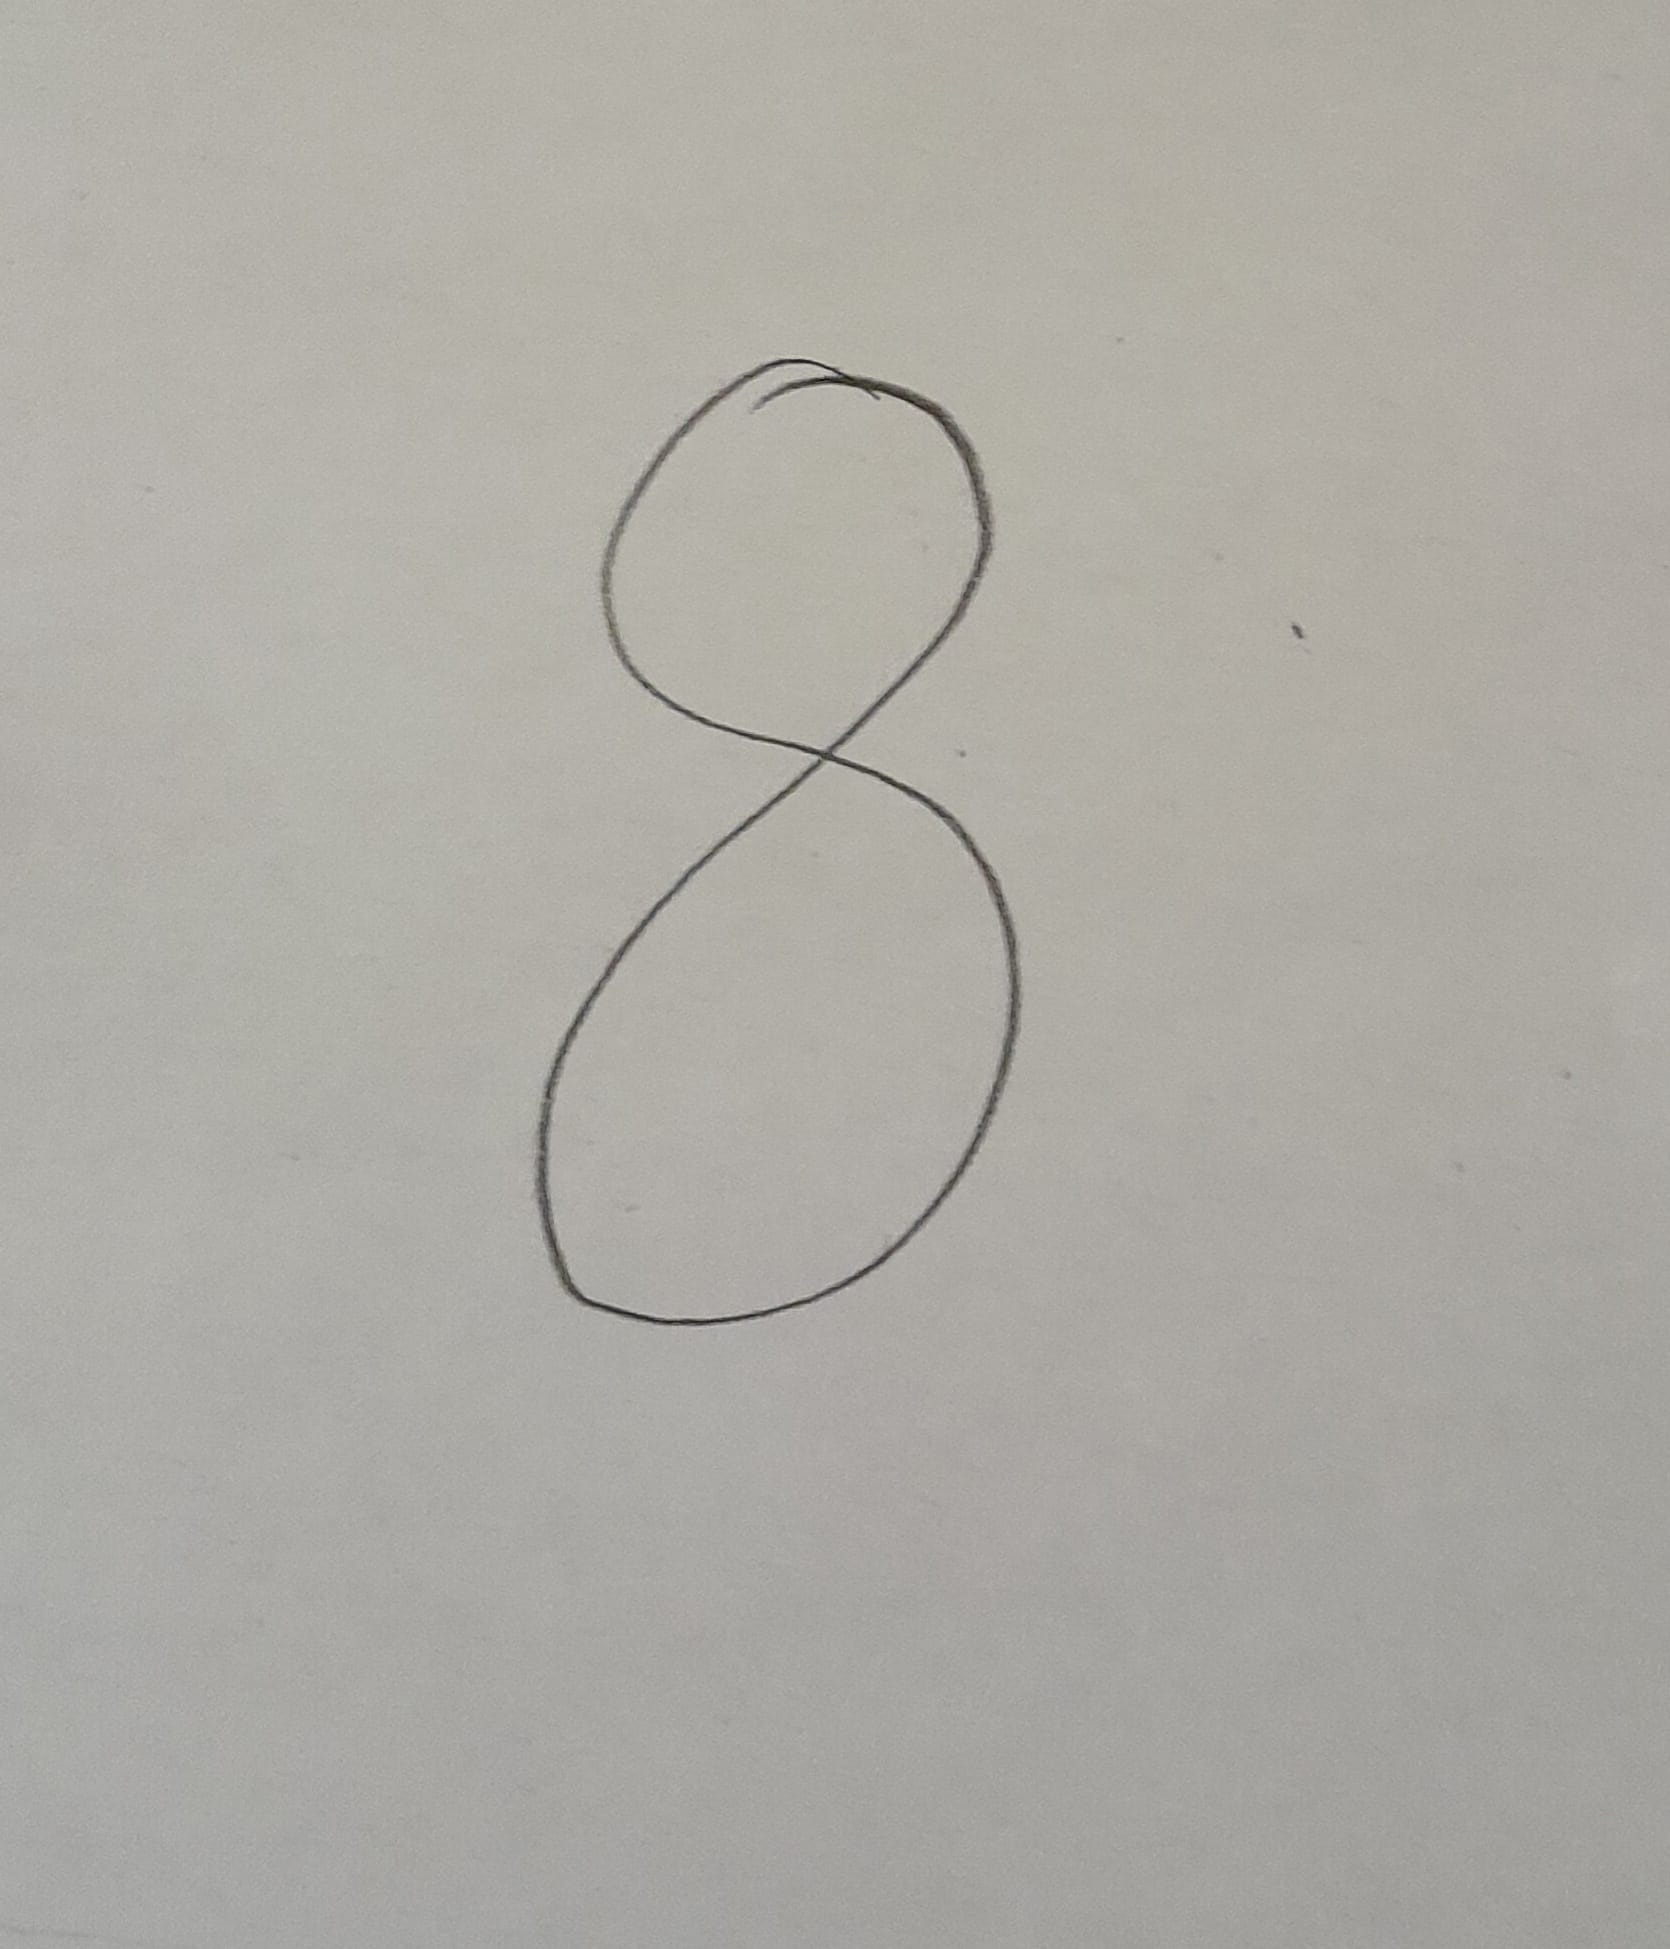

In [242]:
# first example
from PIL import Image
from IPython.display import display

# picture path
path = r"C:\Users\bulen\Desktop\GITHUB ANA KLASOR\GTU_Deep_Learning_Homeworks\Homework_2\8.jpg"


image = Image.open(path)


display(image)

In [250]:
from PIL import Image
import numpy as np
import tensorflow as tf


path = r"C:\Users\bulen\Desktop\GITHUB ANA KLASOR\GTU_Deep_Learning_Homeworks\Homework_2\8.jpg"

# open image
image = Image.open(path).convert('L')

image = image.resize((28, 28))

image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28, 1)

# Load Model and  Predict
model = tf.keras.models.load_model('MNIST_Model.h5')
prediction = model.predict(image_array)
print(np.argmax(prediction))


1/1 [==============================] - 0s 174ms/step
8


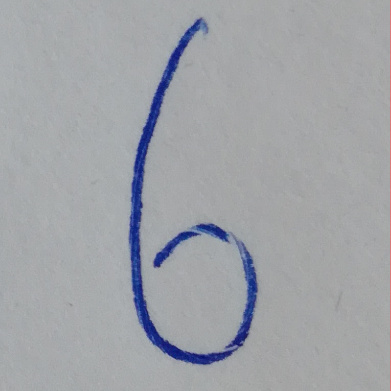

In [252]:
# second  example
from PIL import Image
from IPython.display import display

# file path
path = r"C:\Users\bulen\Desktop\GITHUB ANA KLASOR\GTU_Deep_Learning_Homeworks\Homework_2\6.jpg"

# open image
image_6= Image.open(path)

# Resmi göstershow imageisplay(image_6)

In [253]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
# Dosya yolu "raw string" olarak tanımlanıyor
path = r"C:\Users\bulen\Desktop\GITHUB ANA KLASOR\GTU_Deep_Learning_Homeworks\Homework_2\6.jpg"

# Resmi açma işlemi
image_6 = Image.open(path).convert('L')

image_6 = image.resize((28, 28))

image_array = np.array(image_6)
image_array = image_array.reshape(1, 28, 28, 1)

# Load Model and  Predict
model = tf.keras.models.load_model('MNIST_Model.h5')
prediction = model.predict(image_array)
print(np.argmax(prediction))



1/1 [==============================] - 0s 176ms/step
8


# 3.For the output [0,0,1,0,0,0,0,0,0,0] (i.e., digit 1):


##  Define Helper Functions

In [170]:
def preprocess_image(img):
    # Preprocess the image: normalize values to [0, 1] and reshape
    img = img.reshape((1, 28, 28, 1)).astype('float32') / 255.0
    return img

def deprocess_image(img):
    # Deprocess the image: reshape and denormalize values
    img = img.reshape((28, 28))
    img *= 255.0
    return np.clip(img, 0, 255).astype(np.uint8)

def loss_function(img, target_output):
    # Define the loss function as the mean squared error between predicted and target output
    predictions = model(img)
    return tf.reduce_mean(tf.square(predictions - target_output))

def callback(x):
    # Callback function to visualize the optimization progress
    img = deprocess_image(x)
    plt.imshow(img, cmap='gray')
    plt.show()

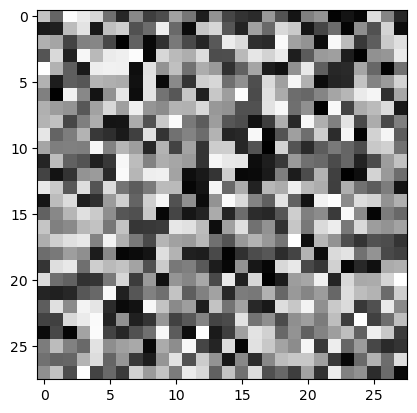

In [174]:
# Target output for digit 1
target_output = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=np.float32)

# Random initialization
initial_image = np.random.rand(28, 28)

# Minimize the loss function using L-BFGS-B algorithm
result = minimize(
    lambda x: loss_function(preprocess_image(x), target_output),
    initial_image.flatten(),
    method='L-BFGS-B',  # Optimization algorithm
    bounds=[(0, 1)] * (28 * 28), # Bounds to keep pixel values within [0, 1]
    options={'maxiter': 100, 'disp': True},
    callback=callback
)

# Retrieve the optimized image
optimized_image = deprocess_image(result.x)
plt.imshow(optimized_image, cmap='gray')
plt.show()

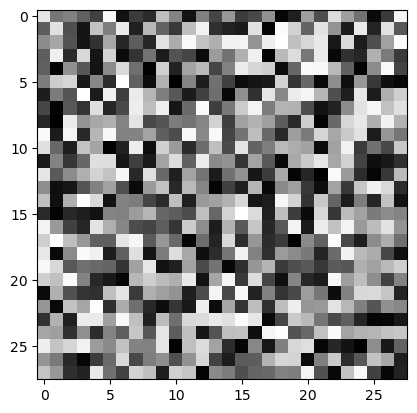

In [202]:
# Target output for digit 1
target_output = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=np.float32)

# Random initialization
initial_image = np.random.rand(28, 28)

# Minimize the loss function using L-BFGS-B algorithm
result = minimize(
    lambda x: loss_function(preprocess_image(x), target_output),
    initial_image.flatten(),
    method='L-BFGS-B',  # Optimization algorithm
    bounds=[(0, 1)] * (28 * 28), # Bounds to keep pixel values within [0, 1]
    options={'maxiter': 200, 'disp': True},
    callback=callback
)

# Retrieve the optimized image
optimized_image_2 = deprocess_image(result.x)
plt.imshow(optimized_image_2, cmap='gray')
plt.show()

In [181]:
from PIL import Image

# Specify the path to your image file
image_path = r"C:\Users\bulen\Desktop\GITHUB ANA KLASOR\GTU_Deep_Learning_Homeworks\Homework_2\8.jpg"  # Replace with the actual path to your image

# Open the image using Pillow
image = Image.open(image_path)

# Resize the image to 28x28
resized_image = image.resize((28, 28))

# Convert the image to grayscale if it's in color
resized_image = resized_image.convert("L")

# Save or display the resized image
resized_image.save("path_to_save_resized_image.jpg")   # Replace with the desired save path
resized_image.show()


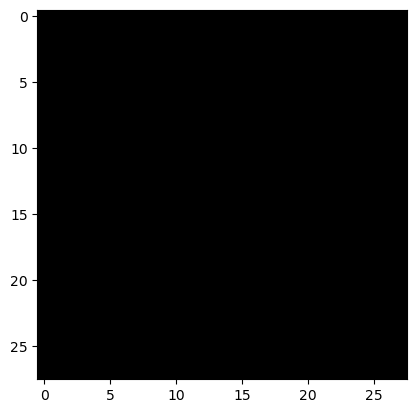

In [188]:
# Load an actual image of digit 1
actual_image = plt.imread( r"C:\Users\bulen\Desktop\GITHUB ANA KLASOR\GTU_Deep_Learning_Homeworks\Homework_2\resized_image_8.jpg")  
# Replace with the path to your image

# Add noise to the image as the initial guess
initial_image_with_noise = actual_image + np.random.normal(scale=0.1, size=actual_image.shape)

# Minimize the loss function with the noisy image as the initial guess
result_with_noise = minimize(
    lambda x: loss_function(preprocess_image(x), target_output),
    initial_image_with_noise.flatten(),
    method='L-BFGS-B',
    bounds= [(0, 1)] * (28 * 28),
    options={'maxiter': 200, 'disp': True},
    callback=callback
)

# Retrieve the optimized image with noise
optimized_image_with_noise = deprocess_image(result_with_noise.x)
plt.imshow(optimized_image_with_noise, cmap='gray')
plt.show()

# 
# Load Model and  Predict

In [189]:

image_array = np.array(optimized_image_with_noise)
image_array = image_array.reshape(1, 28, 28, 1)

# Load Model and  Predict
model = tf.keras.models.load_model('MNIST_Model.h5')
prediction = model.predict(image_array)
print(np.argmax(prediction))
# NumPy's argmax function is used to find the position (index) of the largest element in an array. 
#The function returns the index of the largest element in a given array.


1/1 [==============================] - 0s 168ms/step
8


In [190]:
image_array = np.array(optimized_image)
image_array = image_array.reshape(1, 28, 28, 1)

# Load Model and  Predict
model = tf.keras.models.load_model('MNIST_Model.h5')
prediction = model.predict(image_array)
print(np.argmax(prediction))

1/1 [==============================] - 0s 194ms/step
8


In [203]:
image_array_2 = np.array(optimized_image_2)
image_array_2 = image_array_2.reshape(1, 28, 28, 1)

# Load Model and  Predict
model = tf.keras.models.load_model('MNIST_Model.h5')
prediction = model.predict(image_array_2)
print(np.argmax(prediction))

1/1 [==============================] - 0s 211ms/step
8


#  Result and Conclusion